# Chapter 3 練習と総合問題解答

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

#### <練習問題 3-1>

本章でダウンロードしたポルトガル語の成績データであるstudet-por.csvを読み込んで、要約統計量を表示してください。

In [2]:
cd ./chap3

/Users/norikazu/Desktop/gci/chapters/chap3


In [3]:
# 解答
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


#### <練習問題 3-2>

以下の変数をキーとして、数学の成績データ（`student-mat.csv`）とポルトガル語の成績データ（`student-por.csv`）の結果をマージしてください。マージするときは、両方にデータが含まれている（欠けていない）データを対象としてください（内部結合と言います）。

そして、要約統計量を計算してください。

なお、以下以外の変数は、それぞれのデータで同名の変数名があり重複するので、`suffixes=('_math', '_por')`のパラメータを追加して、どちらからのデータのものかわかるようにしてください。

`['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']`

In [4]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [5]:
# 解答
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                      , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))
student_data_merge.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
# 補足：同じ変数名だが、データソースが異なるため、同じデータではない例
# 「student_data_merge.traveltime_math」と「student_data_merge.traveltime_por」のデータが同じでない（==）行をカウント
sum(student_data_merge.traveltime_math==student_data_merge.traveltime_por)

377

#### <練習問題 3-3>

<練習問題 3-3>でマージしたデータについて、`Medu`、`Fedu`、`G3_math`などの変数をいくつかピックアップして、散布図とヒストグラムを作成してみましょう。どういった傾向がありますか。また、数学データのみの結果と違いはありますか。考察してみましょう。

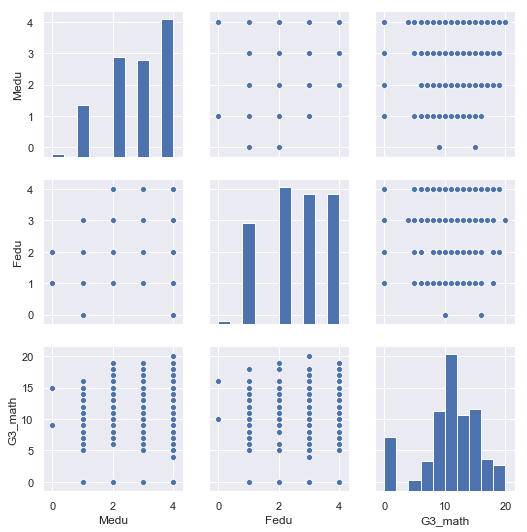

In [7]:
# 解答
sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G3_math']])
plt.grid(True)

考察として、例えば、上のグラフからみるに、MeduやFeduが増えると、G3のスコアもあがるようにみえますが、微妙な差なので、特にこれといった傾向はなさそうです。

#### <練習問題 3-4>

ポルトガル語の成績データであるstudent-por.csvのデータを使って、`G3`を目的変数、`G1`を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。

In [8]:
student_data_por = pd.read_csv('student-por.csv', sep=';')

In [9]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

# 説明変数に "一期目の成績" を利用
X = student_data_por.loc[:, ['G1']].values

# 目的変数に "最終の成績" を利用
Y = student_data_por['G3'].values
 
# 予測モデルを計算
reg.fit(X, Y)
 
# 回帰係数
print('回帰係数:', reg.coef_)
 
# 切片 
print('切片:', reg.intercept_)

 # 決定係数、寄与率とも呼ばれる
print('決定係数:', reg.score(X, Y))

回帰係数: [0.973]
切片: 0.8203984121064565
決定係数: 0.6829156800171085


#### <練習問題 3-5>

練習問題3-4のデータの実際の散布図と、回帰直線を合わせてグラフ化してください。

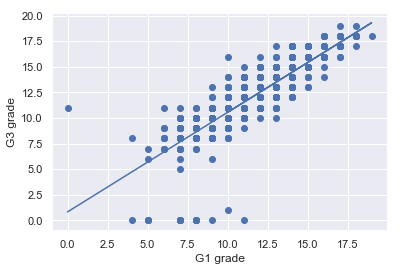

In [10]:
# 散布図
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# その上に線形回帰直線を引く
plt.plot(X, reg.predict(X))
plt.grid(True)

#### <練習問題 3-6>

student-por.csvのデータを使って、`G3`を目的変数、`absences`（欠席数）を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。また、散布図と回帰直線をグラフ化してみましょう。そして、この結果を見て、考察してみましょう。

In [11]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

# 説明変数に "欠席数" を利用
X = student_data_por.loc[:, ['absences']].values

# 目的変数に "最終の成績" を利用
Y = student_data_por['G3'].values
 
# 予測モデルを計算
reg.fit(X, Y)
 
# 回帰係数
print('回帰係数:', reg.coef_)
 
# 切片 
print('切片:', reg.intercept_)

 # 決定係数、寄与率とも呼ばれる
print('決定係数:', reg.score(X, Y))

回帰係数: [-0.064]
切片: 12.138800862687443
決定係数: 0.008350131955637385


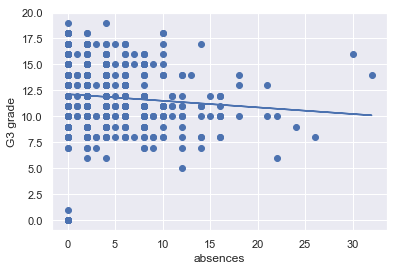

In [12]:
# 散布図
plt.scatter(X, Y)
plt.xlabel('absences')
plt.ylabel('G3 grade')

# その上に線形回帰直線を引く
plt.plot(X, reg.predict(X))
plt.grid(True)

グラフから、右下がり（欠席数が増えれば増えるほど、G3の結果が）のようにも見えますが、決定係数がかなり低いので、あくまで参考に見る程度になります。

## 3.5 総合問題

### ■総合問題3-1　統計の基礎と可視化

以下のサイトにあるデータ（ワインの品質）を読み込み、以下の問いに答えてください。

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

（1）要約統計量（平均、最大値、最小値、標準偏差など）を算出してください。


なお、pandasには、データをアウトプットできるメソッド（`to_csv`）もありますので、余裕があれば、計算した基本統計量の結果をCSVファイルに保存するところまでやってみましょう。

In [13]:
# 解答
# まずはデータを読み込み、先頭5行を読み込み
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


たとえば、wine_data.csvという名前でファイルを保存したかったら以下のように実行します。

In [14]:
file_name = 'wine_data.csv'
wine.to_csv(file_name)

#### データの説明

fixed acidity：酒石酸濃度<br>
volatile acidity：酢酸酸度<br>
citric acid：クエン酸濃度<br>
residual sugar：残留糖濃度<br>
chlorides：塩化物濃度<br>
free sulfur dioxide：遊離亜硫酸濃度<br>
total sulfur dioxide：亜硫酸濃度<br>
density：密度<br>
pH：pH<br>
sulphates：硫酸塩濃度<br>
alcohol：アルコール度数<br>
quality：0-10 の値で示される品質のスコア<br>

In [15]:
# 解答(1)
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


（2）それぞれの変数の分布と、それぞれの変数の関係性（2変数間のみ）がわかるように、グラフ化してみましょう。すべての変数を用いて実行すると時間がかかりますので、注意しましょう。何かわかる傾向はありますか。

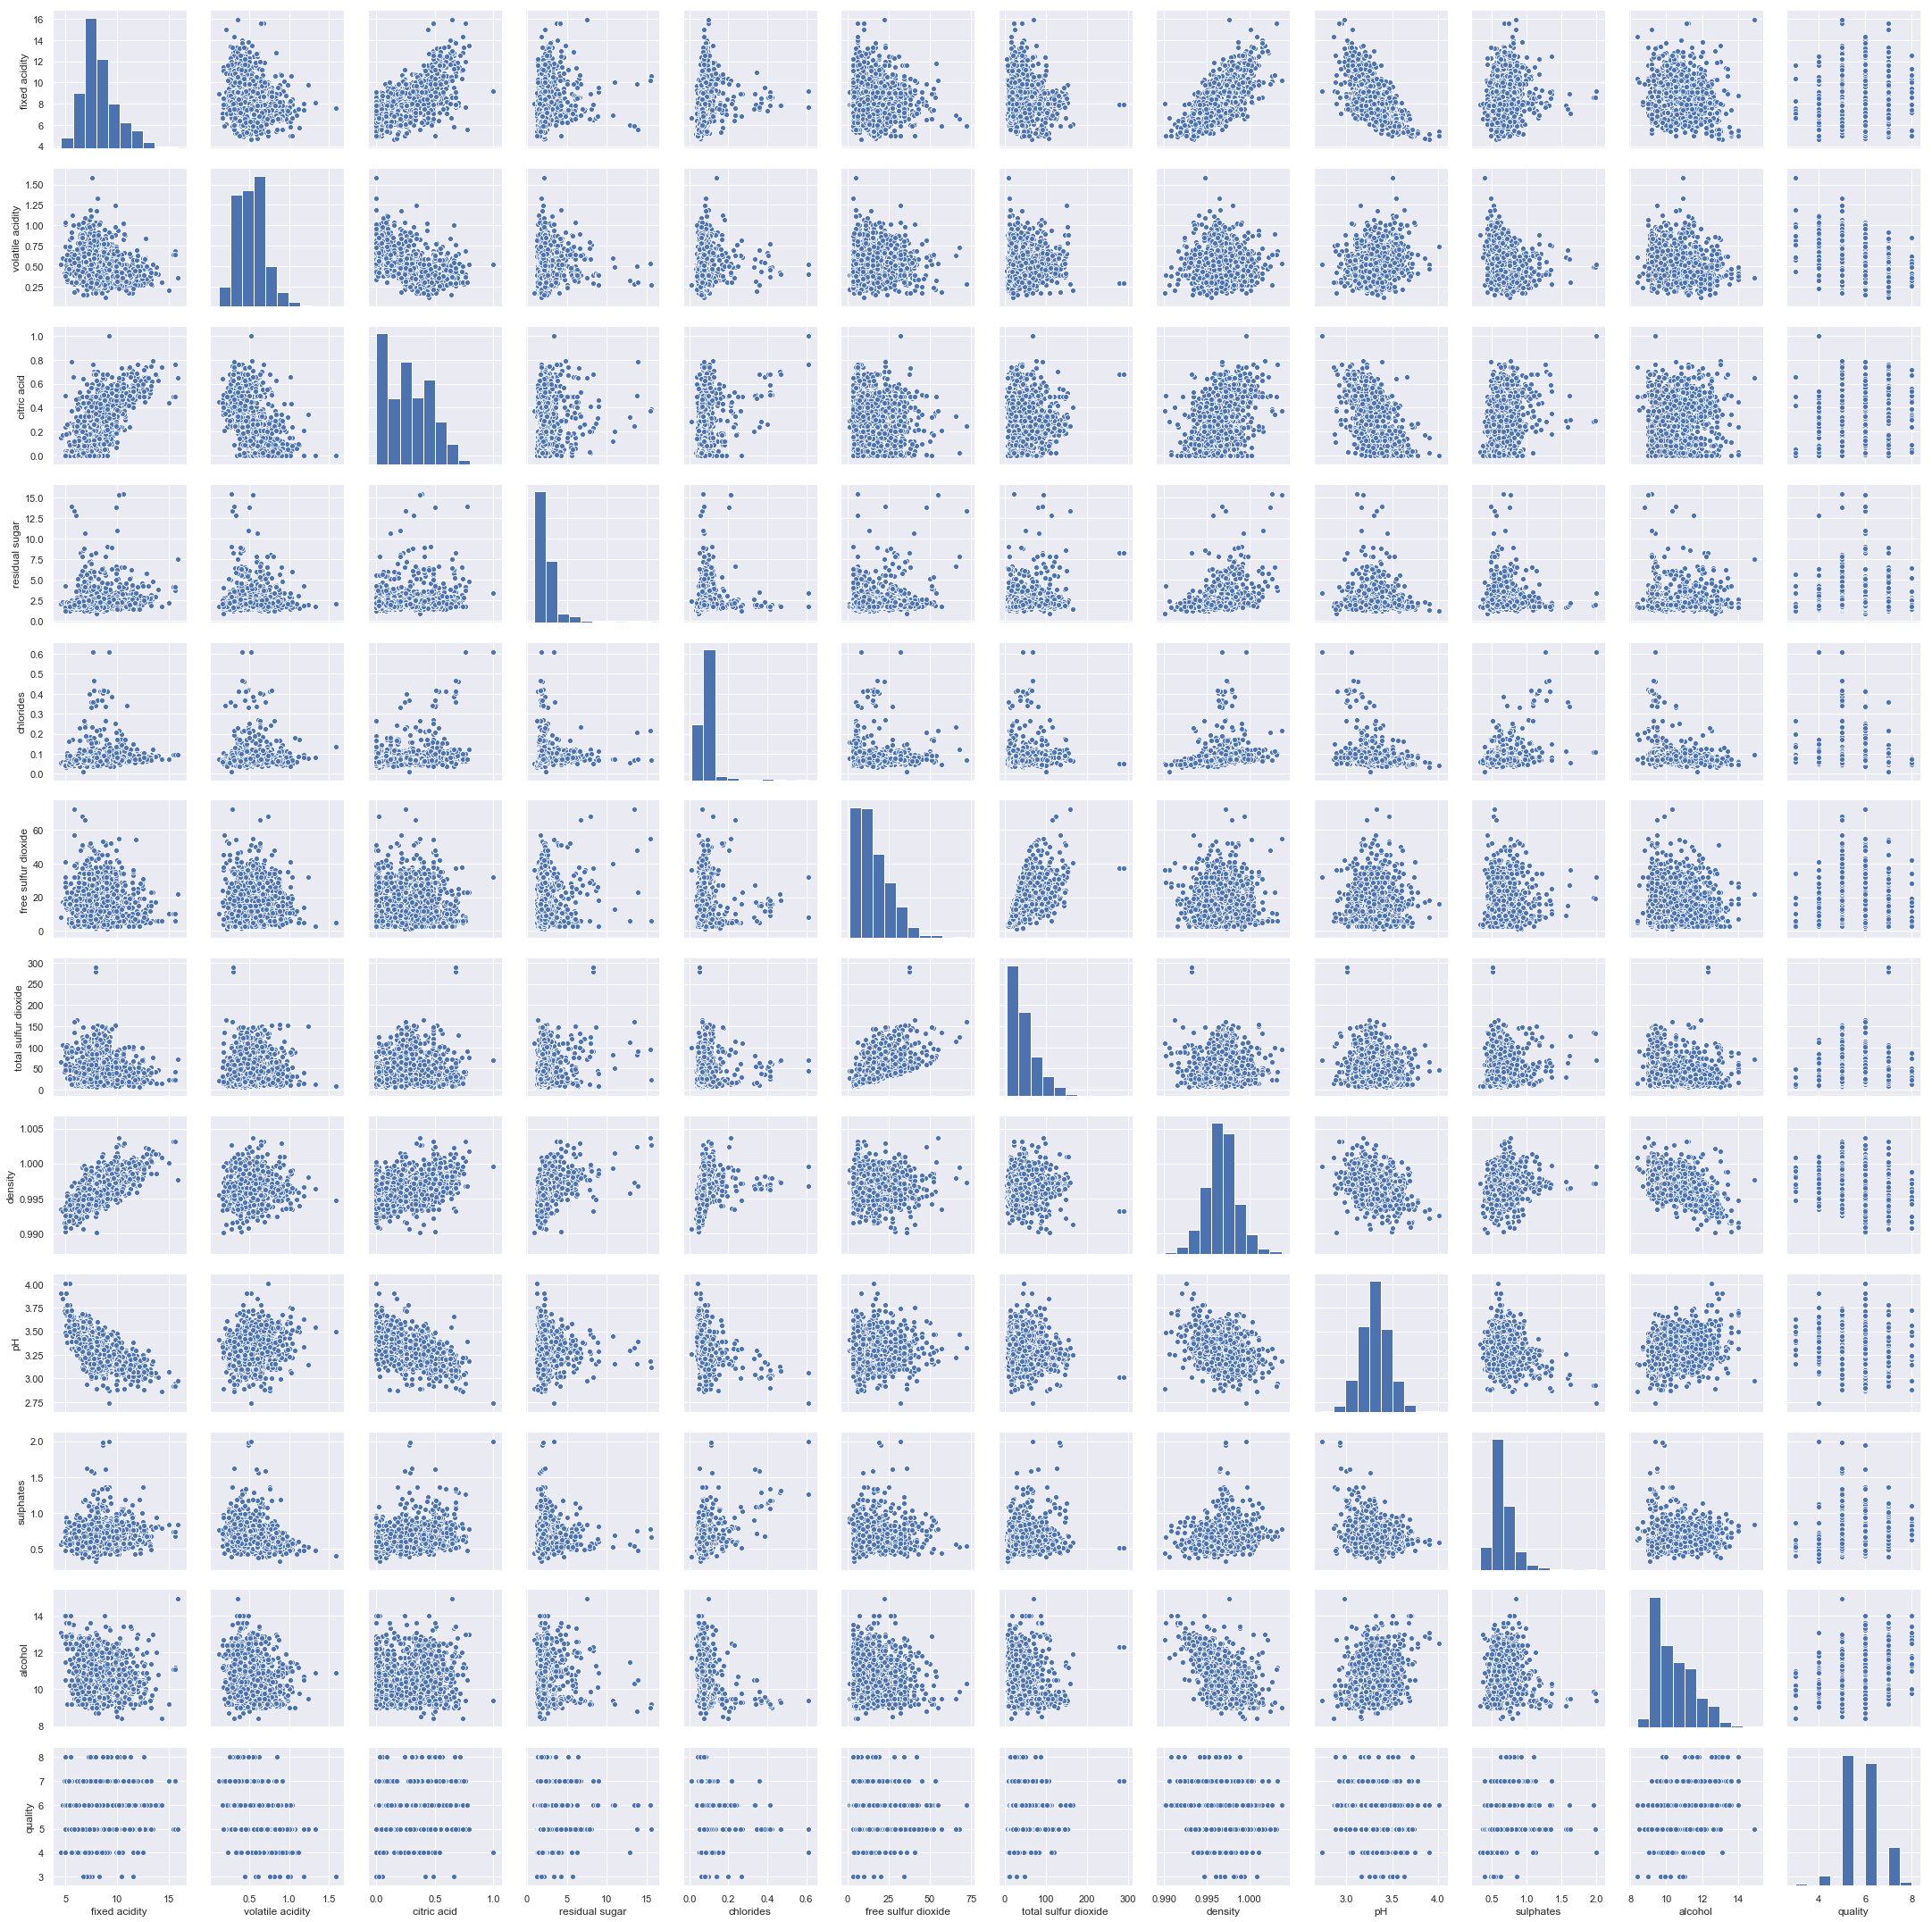

In [16]:
#解答(2)
sns.pairplot(wine)

上の散布図について、相関があるものないものがあるようです。

### ■総合問題3-2 ローレンツ曲線とジニ係数

本章で使用したstudent_data_mathのデータを使って、以下の問いに答えてください。以下で使用する変数は、「`student_data_math = pd.read_csv('student-mat.csv', sep=';')`」のようにして`student-mat.csvをDataFrame`として読み込んだデータです。 

以下で扱うローレンツ曲線やジニ係数は、貧富の格差（地域別、国別など）を見るための指標として使われています。なお、本問題は少し難易度が高いため、参考程度に見てください。ローレンツ曲線やジニ計数について詳しく知りたい方は、参考文献「A-5」などを参照してみてください。

（1）一期目の数学データ（G1変数）について、男女別に昇順に並び替えをしてください（男=sexが"F"、女=sexが"M"のデータです）。そして、横軸に人数の累積比率、縦軸に一期目の値の累積比率をとってください。この曲線をローレンツ曲線といいます。このローレンツ曲線を男女別に一期目の数学成績でグラフ化してください。なお、累積比率については、同じような計算を第2章のNumpyでやっていますので（積み上げ割合）、それを参考にしてください。

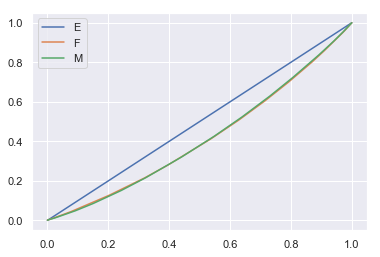

In [17]:
# 解答(1)
student_data_math_F = student_data_math[student_data_math.sex=='F']
student_data_math_M = student_data_math[student_data_math.sex=='M']

# 昇順にする
sorted_data_G1_F = student_data_math_F.G1.sort_values()
sorted_data_G1_M = student_data_math_M.G1.sort_values()

# グラフ作成用のデータ
len_F = np.arange(len(sorted_data_G1_F))
len_M = np.arange(len(sorted_data_G1_M))

# ローレンツ曲線
plt.plot(len_F/len_F.max(), len_F/len_F.max(), label='E') # 完全平等
plt.plot(len_F/len_F.max(), sorted_data_G1_F.cumsum()/sorted_data_G1_F.sum(), label='F')
plt.plot(len_M/len_M.max(), sorted_data_G1_M.cumsum()/sorted_data_G1_M.sum(), label='M')
plt.legend()
plt.grid(True)



（2）不平等の程度を数値で表したものをジニ係数といいます。ジニ係数の定義は、次の通りです。$\overline{x}$は平均値です。

\begin{eqnarray}
GI=\sum_{i}\sum_{j}\left| \frac{x_i-x_j}{2n^2 \overline{x}}\right|
\end{eqnarray}

ジニ係数は、ローレンツ曲線と45度線で囲まれた部分の面積の2倍の値で、0から1の値を取ります。値が大きければ大きいほど、不平等の度合いが大きくなります。この式を利用して、男女の一期目の成績について、ジニ係数をそれぞれ求めてください。

In [18]:
# 解答(2)
# ジニ係数計算するための関数
def heikinsa(data):
    subt = []
    for i in range(0, len(data)-1):
        for j in range(i+1, len(data)):
            subt.append(np.abs(data[i] - data[j]))
    return float(sum(subt))*2 / (len(data) ** 2)
    
def gini(heikinsa, data):
    return heikinsa / (2 * np.mean(data))

print('男性の数学の成績に関するジニ係数:', gini(heikinsa(np.array(sorted_data_G1_M)), np.array(sorted_data_G1_M)))
print('女性の数学の成績に関するジニ係数:', gini(heikinsa(np.array(sorted_data_G1_F)), np.array(sorted_data_G1_F)))

男性の数学の成績に関するジニ係数: 0.17197351667939903
女性の数学の成績に関するジニ係数: 0.1723782950865341
